# IEEE Fraud Detection

## Gather The Data

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH = 'datasets/ieee-fraud-detection'
train_identity = pd.read_csv(os.path.join(DATASET_PATH, 'train_identity.csv'))
test_identity = pd.read_csv(os.path.join(DATASET_PATH, 'test_identity.csv'))
train_transaction = pd.read_csv(os.path.join(DATASET_PATH, 'train_transaction.csv'))
test_transaction = pd.read_csv(os.path.join(DATASET_PATH, 'test_transaction.csv'))

In [3]:
train_set = pd.merge(train_identity, train_transaction, how='inner', on = 'TransactionID')
test_set = pd.merge(test_identity, test_transaction, how='inner', on = 'TransactionID')

In [4]:
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

In [5]:
train_transaction.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [6]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [7]:
train_labels = train_transaction.select_dtypes([object])
train_numbers = train_transaction.select_dtypes([np.float64, np.int64])
label_atrrs = train_labels.columns.values
numbers_attrs = train_numbers.columns.values

## Deleting Null Columns


In [8]:
train_numbers.info(max_cols=400)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 380 columns):
TransactionID     590540 non-null int64
isFraud           590540 non-null int64
TransactionDT     590540 non-null int64
TransactionAmt    590540 non-null float64
card1             590540 non-null int64
card2             581607 non-null float64
card3             588975 non-null float64
card5             586281 non-null float64
addr1             524834 non-null float64
addr2             524834 non-null float64
dist1             238269 non-null float64
dist2             37627 non-null float64
C1                590540 non-null float64
C2                590540 non-null float64
C3                590540 non-null float64
C4                590540 non-null float64
C5                590540 non-null float64
C6                590540 non-null float64
C7                590540 non-null float64
C8                590540 non-null float64
C9                590540 non-null float64
C10            

### Percent Imputer
First we delete columns which have less than 60% of all entry numbers. 

In [9]:
from sklearn.base import TransformerMixin, BaseEstimator
class PercentImputer(TransformerMixin, BaseEstimator):
    def __init__(self, percent=0.6):
        self.percent = percent
    def fit(self, X, y=None):
        length = len(X)
        nulls_count = X.isnull().sum()
        labels = X.columns.values
        self.new_labels = []
        for label in labels:
            if(nulls_count[label] < self.percent * length):
                self.new_labels.append(label)
        return self
    def transform(self, X, y=None):
        return X[self.new_labels]

In [10]:
p_number_imputer = PercentImputer(percent=0.6)
p_labels_imputer = PercentImputer(percent=0.55)
numbers_p_imputed = p_number_imputer.fit_transform(train_numbers)
labels_p_imputed = p_labels_imputer.fit_transform(train_labels)

In [11]:
train_numbers.info()
numbers_p_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 380 entries, TransactionID to V339
dtypes: float64(376), int64(4)
memory usage: 1.7 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 213 entries, TransactionID to V321
dtypes: float64(209), int64(4)
memory usage: 959.7 MB


### Simple Imputer 
Then impute them with simple imputer and mean method

In [12]:
from sklearn.impute import SimpleImputer
numbers_imputed = SimpleImputer(strategy='mean', verbose=-1).fit_transform(numbers_p_imputed)


In [13]:
numbers_imputed = pd.DataFrame(numbers_imputed, columns=numbers_p_imputed.columns)

#### Drop ID

In [14]:
y = numbers_imputed['isFraud']

In [15]:
numbers_imputed.drop(['TransactionID', 'isFraud'], axis=1, inplace=True)

## Visualize

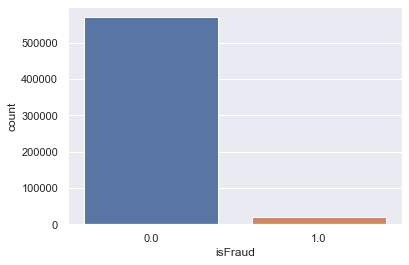

In [16]:
sns.countplot(y)

## Analys numbers of transactions

### Transaction Amount 

(0, 7000)

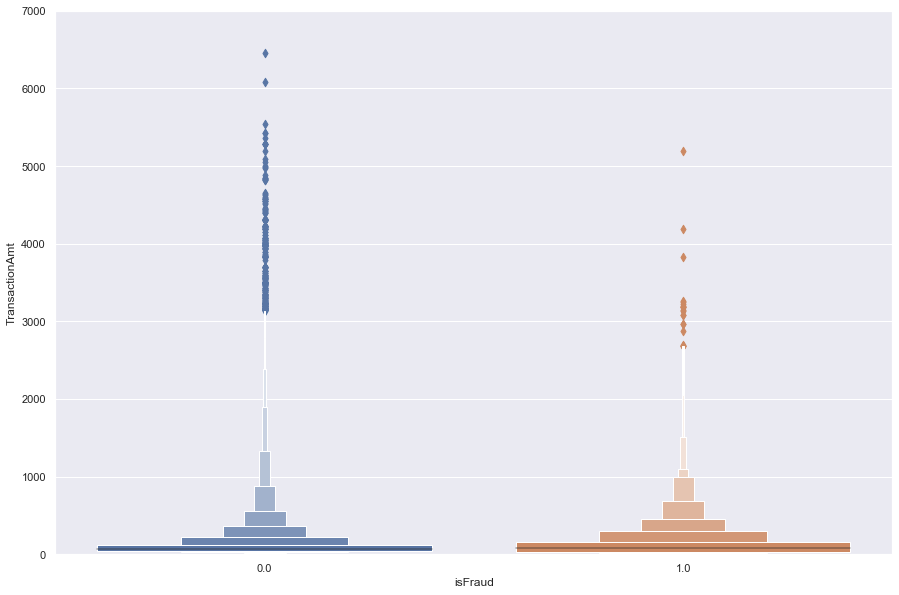

In [255]:
plt.figure(figsize=(15, 10))
sns.boxenplot(x=y, y=numbers_imputed['TransactionAmt'])
plt.ylim(top=7000, bottom=0)

As you see we set a ylim to plot. Because there is a number with value about 30000. This number ruins away our plot. It also may destroy our training; therefore, we change numbers above 60000 to 6000. Also we can try to normalize datas.

In [256]:
class NormalizeByLog(BaseEstimator, TransformerMixin):
    def __init__(self, feature_name):
        self.feature_name = feature_name
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        X[self.feature_name] = np.log1p(X[self.feature_name])
        return X

In [257]:
numbers_ta_filtered = NormalizeByLog('TransactionAmt').transform(numbers_imputed)

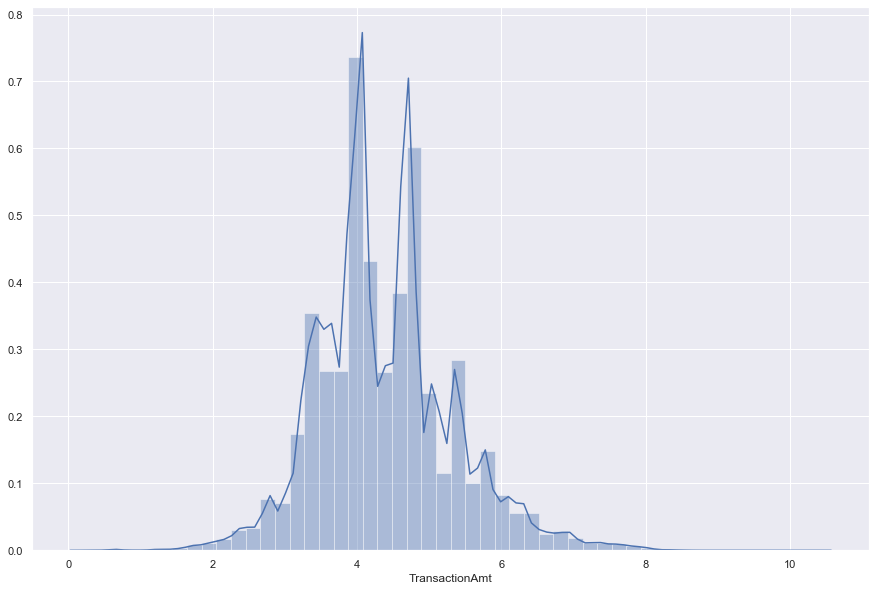

In [258]:
plt.figure(figsize=(15, 10))
sns.distplot(numbers_ta_filtered['TransactionAmt'])

### TransactionDT

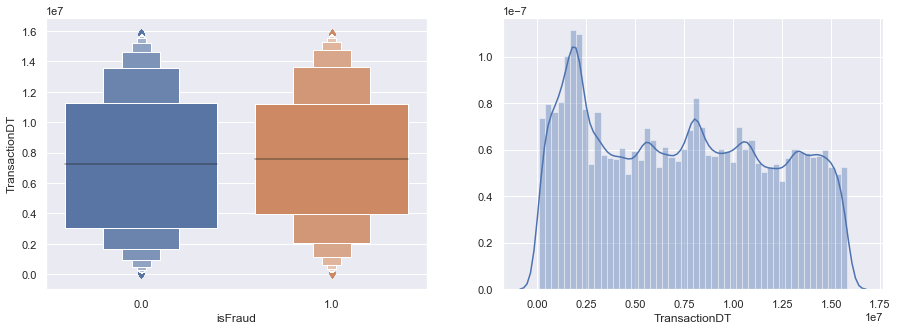

In [259]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.boxenplot(x=y, y=numbers_ta_filtered['TransactionDT'])
plt.subplot(122)
sns.distplot(numbers_ta_filtered['TransactionDT'])

TransactionDT has a normall distriboution and no need to change.

In [260]:
numbers_ta_filtered.info(max_cols=400)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 211 columns):
TransactionDT     590540 non-null float64
TransactionAmt    590540 non-null float64
card1             590540 non-null float64
card2             590540 non-null float64
card3             590540 non-null float64
card5             590540 non-null float64
addr1             590540 non-null float64
addr2             590540 non-null float64
dist1             590540 non-null float64
C1                590540 non-null float64
C2                590540 non-null float64
C3                590540 non-null float64
C4                590540 non-null float64
C5                590540 non-null float64
C6                590540 non-null float64
C7                590540 non-null float64
C8                590540 non-null float64
C9                590540 non-null float64
C10               590540 non-null float64
C11               590540 non-null float64
C12               590540 non-null float64
C13   

### cards

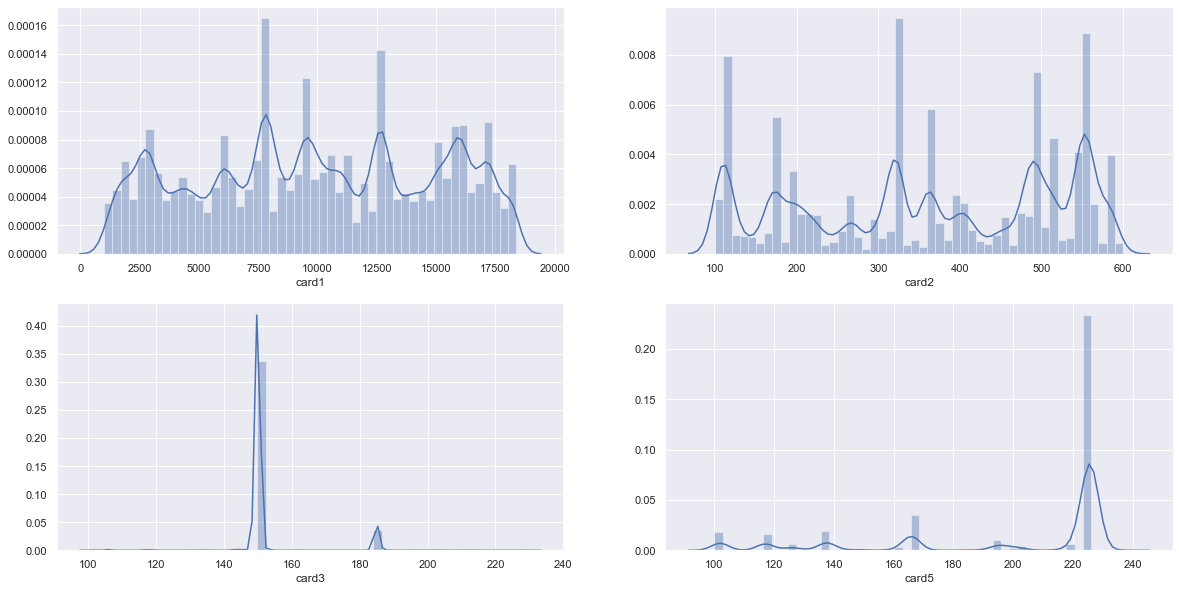

In [266]:
plt.figure(figsize=(20, 10))
l = 0
for i in range(5):
    att = 'card' + str(i+1)
    if att in numbers_ta_filtered:
        l+=1
        plt.subplot(2, 2, l)
        sns.distplot(numbers_ta_filtered[att])


In [267]:
np.unique(numbers_ta_filtered['card3'].values, return_counts = True)

(array([100.        , 101.        , 102.        , 105.        ,
        106.        , 107.        , 108.        , 109.        ,
        111.        , 114.        , 116.        , 117.        ,
        118.        , 119.        , 120.        , 121.        ,
        122.        , 123.        , 124.        , 125.        ,
        126.        , 127.        , 128.        , 129.        ,
        130.        , 131.        , 132.        , 133.        ,
        134.        , 135.        , 136.        , 137.        ,
        138.        , 139.        , 141.        , 142.        ,
        143.        , 144.        , 146.        , 147.        ,
        148.        , 149.        , 150.        , 151.        ,
        152.        , 153.        , 153.19492508, 155.        ,
        156.        , 157.        , 159.        , 160.        ,
        161.        , 162.        , 163.        , 164.        ,
        166.        , 167.        , 168.        , 169.        ,
        170.        , 171.        , 172.

We will drop card3 becasue most of them have a specific value. Here there is a lot of 127-128 numbers (about 522000).

In [268]:
to_drop_numbers = ['card3']

### dist

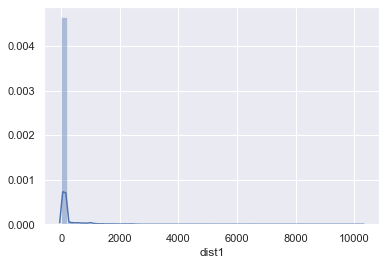

In [270]:
sns.distplot(numbers_ta_filtered['dist1'])

### addrs

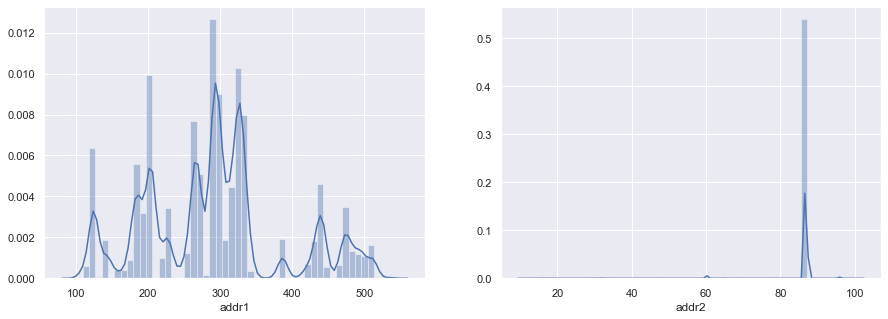

In [271]:
plt.figure(figsize=(15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    sns.distplot(numbers_ta_filtered['addr' + str(i+1)])

In [272]:
np.unique(numbers_imputed['addr2'].values, return_counts = True)

(array([ 10.        ,  13.        ,  14.        ,  15.        ,
         16.        ,  17.        ,  18.        ,  19.        ,
         20.        ,  21.        ,  22.        ,  23.        ,
         24.        ,  25.        ,  26.        ,  27.        ,
         28.        ,  29.        ,  30.        ,  31.        ,
         32.        ,  34.        ,  35.        ,  36.        ,
         38.        ,  39.        ,  40.        ,  43.        ,
         44.        ,  46.        ,  47.        ,  48.        ,
         49.        ,  50.        ,  51.        ,  52.        ,
         54.        ,  55.        ,  57.        ,  59.        ,
         60.        ,  61.        ,  62.        ,  63.        ,
         65.        ,  66.        ,  68.        ,  69.        ,
         70.        ,  71.        ,  72.        ,  73.        ,
         74.        ,  75.        ,  76.        ,  77.        ,
         78.        ,  79.        ,  82.        ,  83.        ,
         84.        ,  86.        ,  86.

From above counts we can recognize most of addr2 features are 86-87. So we can drop this feature from our train set because it we doesn't need this, and it does not have any specific imapct on our predictions.

In [273]:
to_drop_numbers.append('addr2')

## C attributes

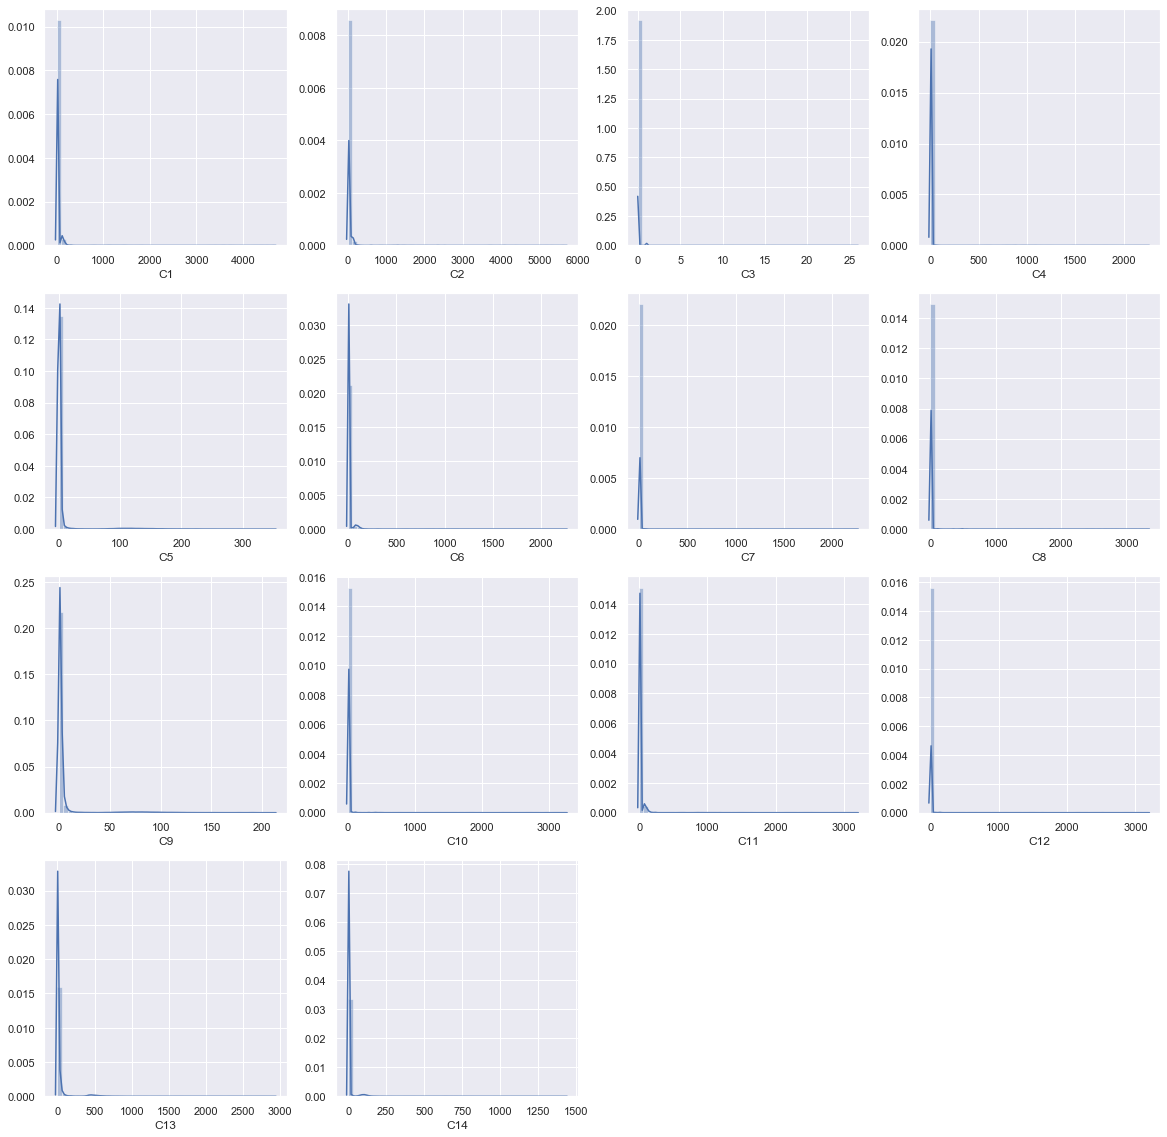

In [274]:
plt.figure(figsize=(20, 20))
for i in range(14):
    plt.subplot(4, 4, i+1)
    sns.distplot(numbers_ta_filtered['C' + str(i+1)])


In [277]:
plt.figure(figsize=(15, 25))
for i in range(14):
    counts = np.unique(numbers_ta_filtered['C' + str(i+1)], return_counts=True)
    less_than_ten = 0
    for j in range(len(counts[0])):
        if counts[0][j] <= 4:
            less_than_ten += counts[1][j]
    print('C' + str(i+1), less_than_ten)
    

C1 502516
C2 500673
C3 590493
C4 583545
C5 550111
C6 530016
C7 585564
C8 576898
C9 539263
C10 577864
C11 531747
C12 584003
C13 349150
C14 519840


<Figure size 1080x1800 with 0 Axes>

Lots of C values are less than 4. we can categorize C attributes into 4 category by their period of values.

There is a lot of numbers which are less than 4. On the other hand there is some numbers with higher value. We can divide these numbers into 4 groups. less than equal 4 and more than 4. 

In [278]:
class CategorizeCs(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        for i in range(14):
            att = 'C'+str(i+1)
            if att in X :
                X[att] = X[att].apply(lambda l : l if l <=4 else 4)
        return X

In [279]:
numbers_cat = CategorizeCs().transform(numbers_ta_filtered)

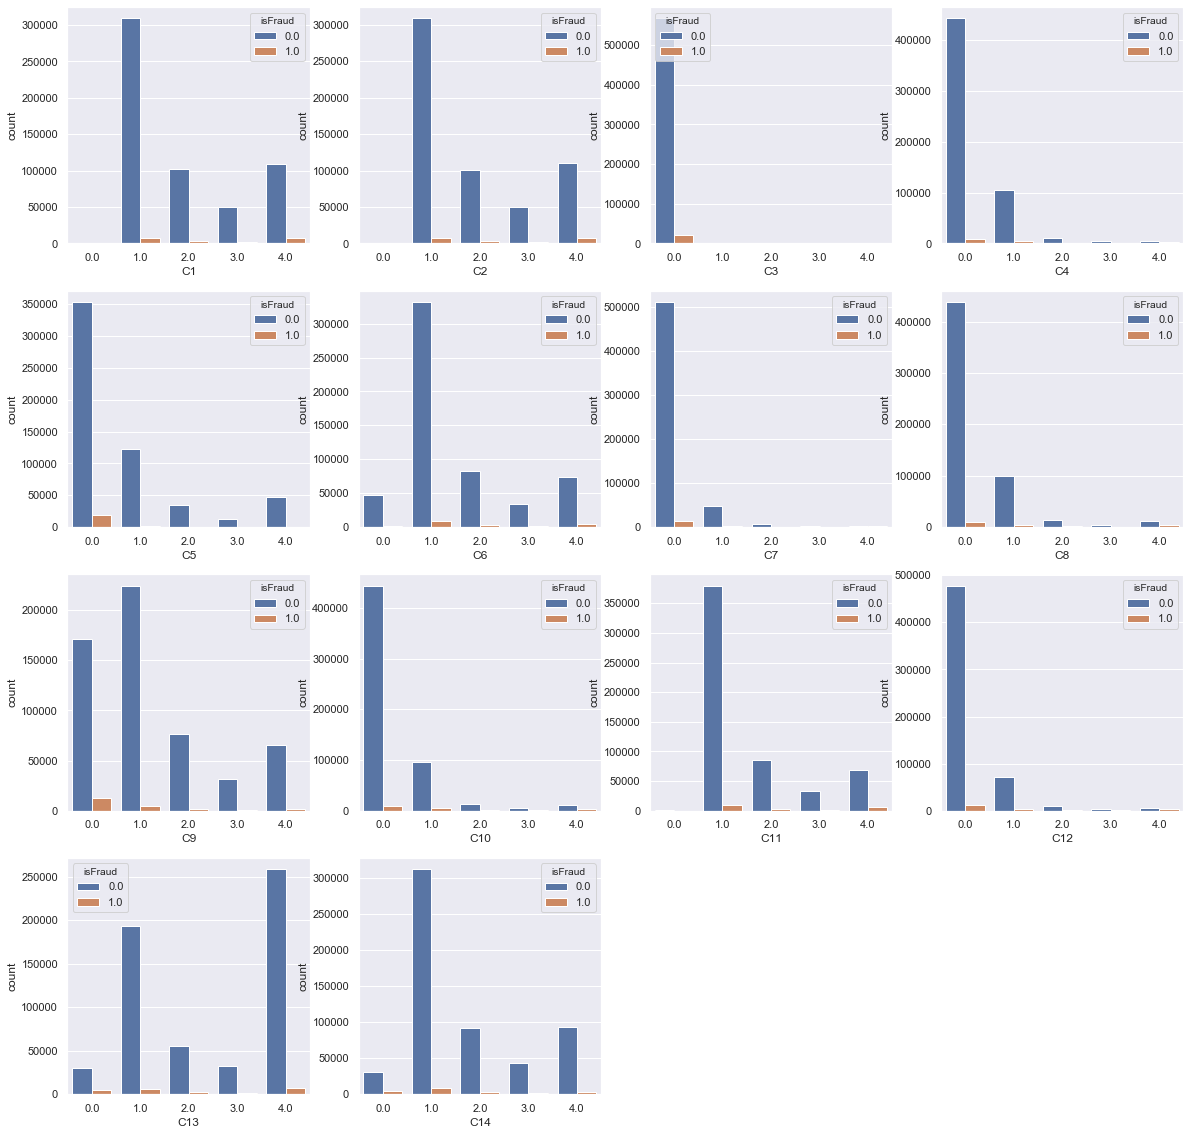

In [280]:
plt.figure(figsize=(20, 20))
for i in range(14):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=numbers_cat['C' + str(i+1)], hue=y)
#     sns.kdeplot(numbers_cat['C' + str(i+1)])

From above plots we recognize all c3 values are zero, so, it is useless and we will drop it. On the other hand C7 can categorize by 2 instead of 4. so, we will change CategorizeCs class.'

In [32]:
to_drop_numbers.append('C3')

In [281]:
class CategorizeCs(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        for i in range(14):
            att = 'C'+str(i+1)
            if att == 'C7' and att in X : 
                X[att] = X[att].apply(lambda l : l if l <=2 else 2)
            elif att in X :
                X[att] = X[att].apply(lambda l : l if l <=4 else 4)
        return X
numbers_cat = CategorizeCs().transform(numbers_ta_filtered)

## D attributes

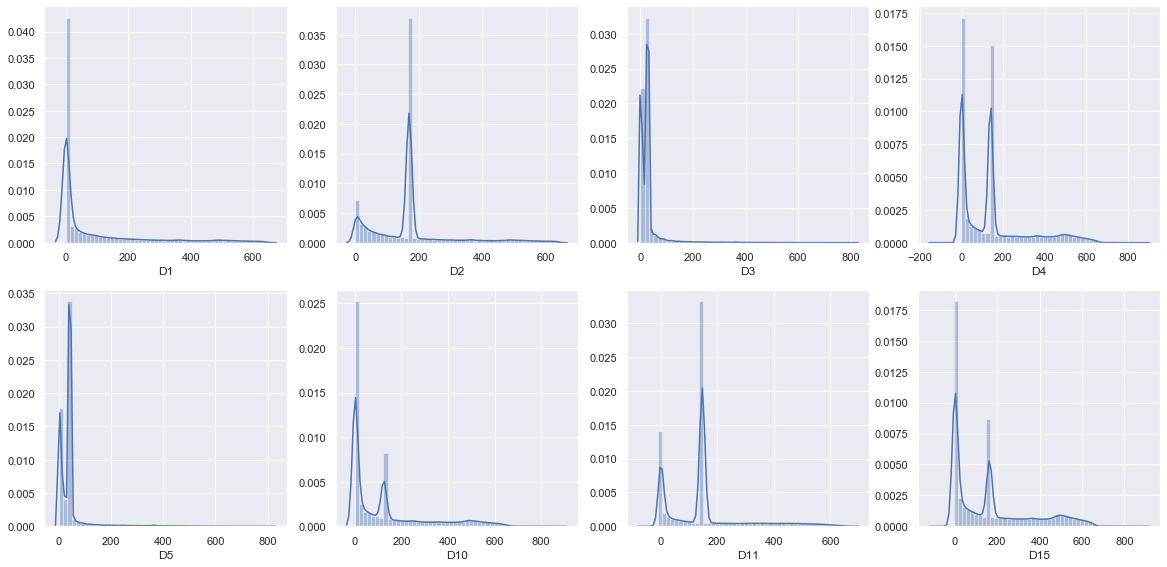

In [282]:
plt.figure(figsize=(20, 20))
j = 1;
for i in range(15):
    att = 'D' + str(i+1)
    if att in numbers_ta_filtered:
        plt.subplot(4, 4, j)
        sns.distplot(numbers_ta_filtered['D' + str(i+1)])
        j+=1

I think it is ok !

## V attributes

In [ ]:
plt.figure(figsize=(20, 64))
j = 1;
for i in range(340):
    att = 'V' + str(i+1)
    if att in numbers_ta_filtered:
        plt.subplot(34, 10, j)
        sns.distplot(numbers_ta_filtered['V' + str(i+1)])
        j+=1

Here we delete features which have just two value more than 80 percent of all values. 

In [36]:
class DropExtraVs(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        self.to_drop = []
        for i in range(340):
            att = 'V' + str(i+1)
            if att in X :
                counts = np.unique(X[att], return_counts=True)[1]
                counts.sort()
                if (counts[len(counts) - 1] + counts[len(counts) - 2]) > 0.85 * len(X) :
                    self.to_drop.append(att)
        return self
    def transform(self, X, y=None):
        return X.drop(self.to_drop, axis=1) 

In [37]:
numbers_v_droped = DropExtraVs().fit_transform(numbers_cat)

In [38]:
numbers_v_droped.head()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,V283,V285,V306,V307,V308,V310,V312,V313,V314,V315
0,86400.0,4.241327,13926.0,362.555488,150.0,142.0,315.0,87.0,1.0,1.0,...,1.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0
1,86401.0,3.401197,2755.0,404.000000,150.0,102.0,325.0,87.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,86469.0,4.094345,4663.0,490.000000,150.0,166.0,330.0,87.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,86499.0,3.931826,18132.0,567.000000,150.0,117.0,476.0,87.0,2.0,4.0,...,0.0,10.0,50.0,1758.0,925.0,354.0,135.0,0.0,0.0,0.0
4,86506.0,3.931826,4497.0,514.000000,150.0,102.0,420.0,87.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Drop extra columns
We gather some columns to drop in these steps. Now in this step we will drop them from dataframe.

In [39]:
class DataFrameDropper(BaseEstimator, TransformerMixin):
    def __init__(self, drop_attrs=[]):
        self.drop_attrs = drop_attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        X.drop(self.drop_attrs, axis=1, inplace=True, errors='ignore')
        return X

In [40]:
final_numbers = DataFrameDropper(drop_attrs=to_drop_numbers).transform(numbers_v_droped)

## Analys Labels of Transactions

In [41]:
labels_p_imputed.head()

,ProductCD,card4,card6,P_emaildomain,M6
0,W,discover,credit,NaN,T
1,W,mastercard,credit,gmail.com,T
2,W,visa,debit,outlook.com,F
3,W,mastercard,debit,yahoo.com,F
4,H,mastercard,credit,gmail.com,NaN


At first we impute null values in our dataframe. For this act we use most frequent value of every columns.


In [42]:
class LabelImputer(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        self.tops = [[], []]
        for col in X:
            self.tops[0].append(str(col))
            self.tops[1].append(X[col].describe()['top'])
        return self
    def transform(self, X, y=None):
        X = X.copy()
        for i in range(len(self.tops[0])):
            X[self.tops[0][i]].fillna(self.tops[1][i], inplace=True)
        return X

In [43]:
label_imputer = LabelImputer()
label_imputed = label_imputer.fit_transform(labels_p_imputed)

In [44]:
label_imputed.describe()

,ProductCD,card4,card6,P_emaildomain,M6
count,590540,590540,590540,590540,590540
unique,5,4,4,59,2
top,W,visa,debit,gmail.com,F
freq,439670,386344,441509,322811,397216


Then we try to analys each column separately.

### Prodocut CD

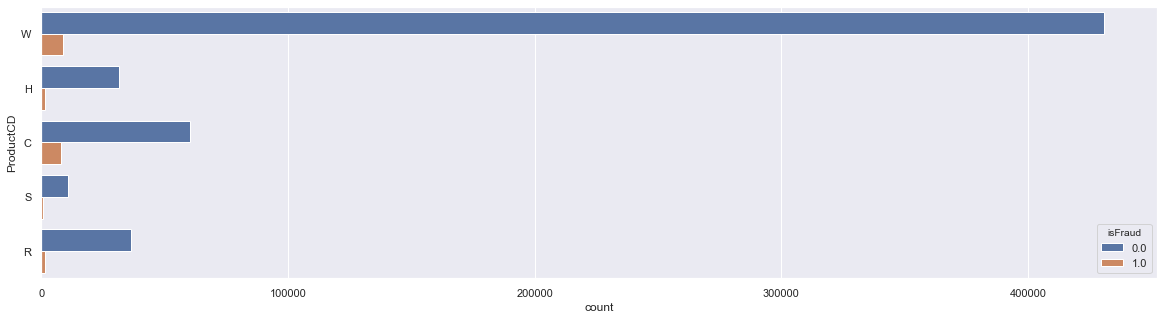

In [45]:
plt.figure(figsize=(20, 5))
sns.countplot(y=label_imputed['ProductCD'], hue=y)

It seems most of ProductCDs values are `W`. On the other hand `C` values have a good possibility to be Fraud. This data seems has not any specific problem.

### cards

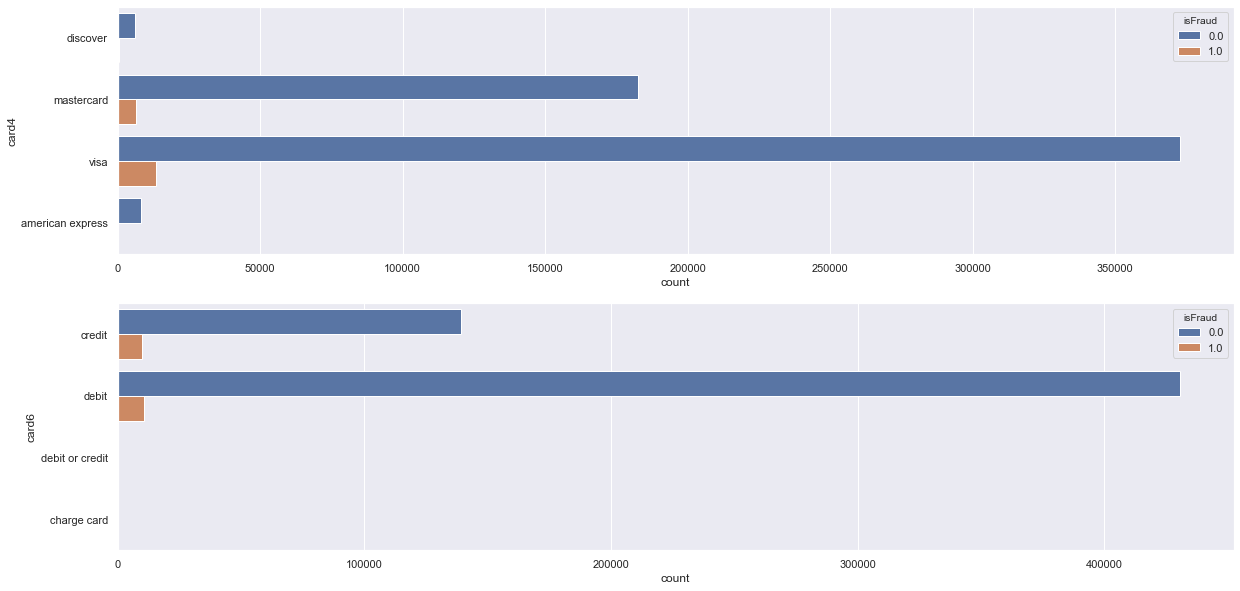

In [46]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
sns.countplot(y=label_imputed['card4'], hue=y)
plt.subplot(212)
sns.countplot(y=label_imputed['card6'], hue=y)

In card6 we have two category which have not any count. Let see values count correctly.


In [47]:
label_imputed[['card6', 'card4']].groupby('card6').agg(['count']).stack()

,,card4
card6,,
charge card,count,15
credit,count,148986
debit,count,441509
debit or credit,count,30


There is 15 charge card and 30 debit or credit which all of them are not fraud. so we change these two category into debit.


In [48]:
class ChangeToDebit(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        X['card6'] = X['card6'].apply(lambda l: l if not l == 'debit or credit' and not l == 'charge card' else 'debit')
        return X

In [49]:
label_card6_changed = ChangeToDebit().transform(label_imputed)

card4 seems to be correct and we don't change it.

### P_emaildomain

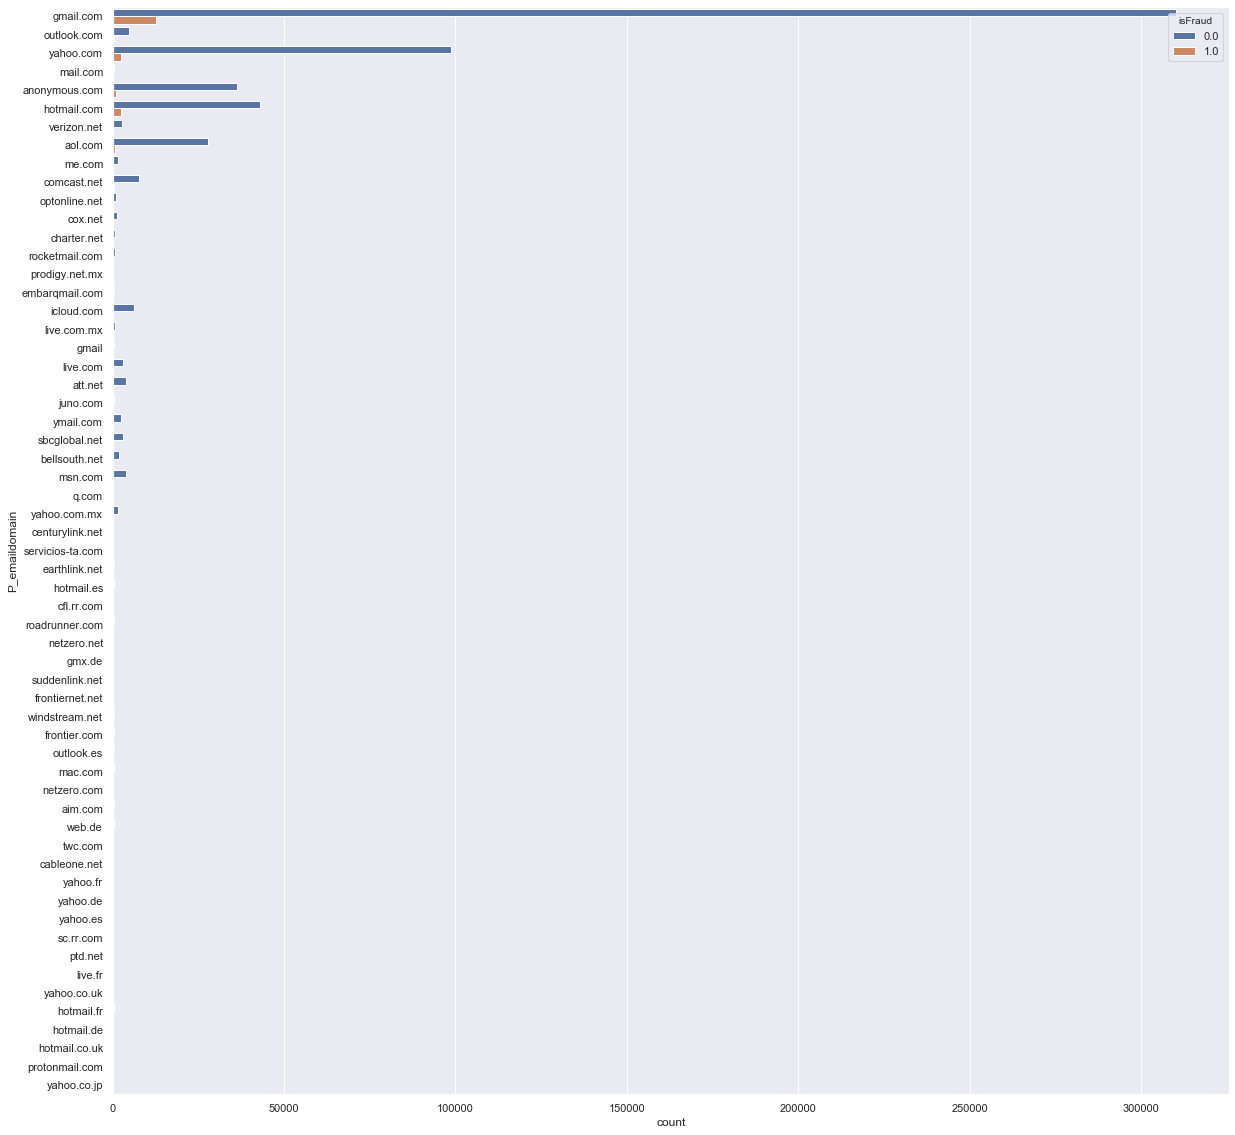

In [50]:
plt.figure(figsize=(20, 20))
sns.countplot(y=label_card6_changed['P_emaildomain'], hue=y)

From this plot we can make new categoris. `gmail.com` , `yahoo.com`, `anonymous.com`, `hotmail.com`, `aol.com` and `others`.

In [51]:
class CategorizeEmail(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        X['P_emaildomain'] = X['P_emaildomain'].apply(lambda l: l if l == 'gmail.com' or 
                                                      l == 'yahoo.com' or
                                                      l == 'anonymous.com' or 
                                                      l == 'hotmail.com' or
                                                      l == 'aol.com'
                                                      else 'others')
        return X

In [52]:
label_mail_changed = CategorizeEmail().transform(label_card6_changed)

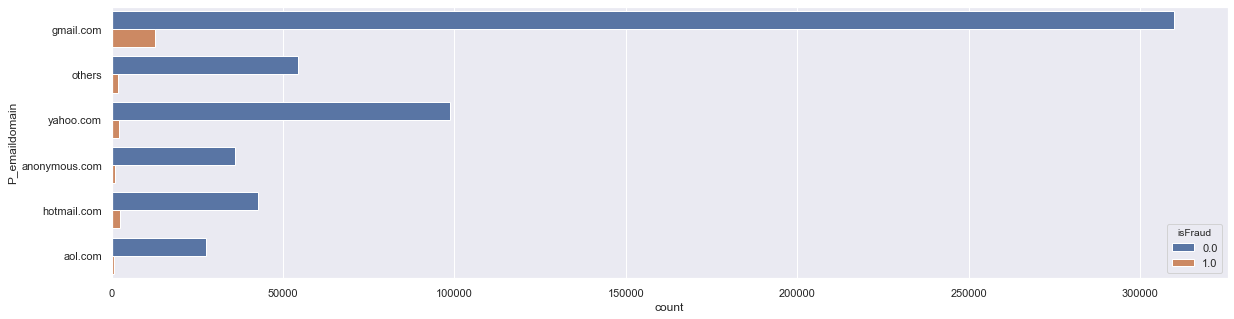

In [53]:
plt.figure(figsize=(20, 5))
sns.countplot(y=label_mail_changed['P_emaildomain'], hue=y)

### M6

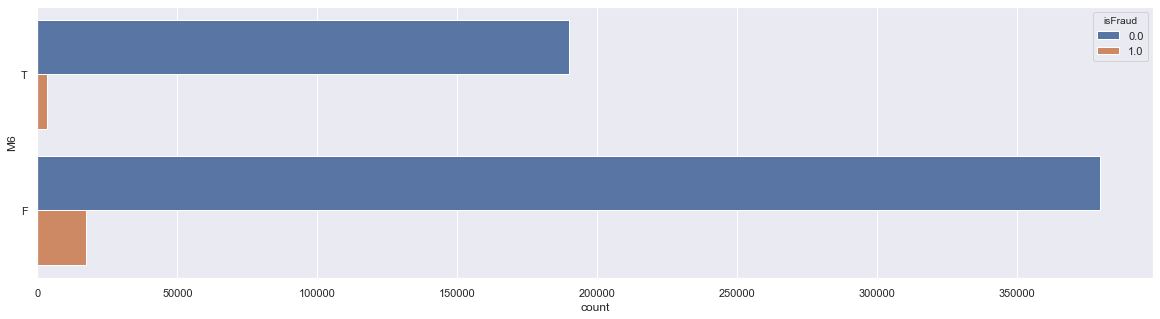

In [54]:
plt.figure(figsize=(20, 5))
sns.countplot(y=label_mail_changed['M6'], hue=y)

It seems has not any problem.

### Encoding labels

In [109]:
from sklearn.preprocessing import OneHotEncoder
class OneHotGoodEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder()
    def fit(self, X, y=None): 
        self.encoder.fit(X)
        return self
    def transform(self, X, y=None):
        columns = X.columns
        X_transformed = self.encoder.transform(X).toarray()
        cats = self.encoder.categories_
        i = 0
        labels = []
        for cat in cats:
            for c in cat:
                labels.append(columns[i] + ' : ' + c)
            i = i+1
        return pd.DataFrame(X_transformed, columns=labels)

In [56]:
encoder = OneHotGoodEncoder()
encoder.fit(label_mail_changed)
label_encoded = encoder.transform(label_mail_changed)

#### Compute P-Value score
With p-value we can recognize to delete which one of them.

In [57]:
from sklearn.feature_selection import f_regression
F, p_value = f_regression(label_encoded, y)
np.array(label_encoded.columns) + " = " + (p_value < 0.05).astype(str) 

array(['ProductCD : C = True', 'ProductCD : H = True',
       'ProductCD : R = True', 'ProductCD : S = True',
       'ProductCD : W = True', 'card4 : american express = True',
       'card4 : discover = True', 'card4 : mastercard = False',
       'card4 : visa = False', 'card6 : credit = True',
       'card6 : debit = True', 'P_emaildomain : anonymous.com = True',
       'P_emaildomain : aol.com = True',
       'P_emaildomain : gmail.com = True',
       'P_emaildomain : hotmail.com = True',
       'P_emaildomain : others = True',
       'P_emaildomain : yahoo.com = True', 'M6 : F = True',
       'M6 : T = True'], dtype=object)

All of categories have true values. So we can not delete them. 

## Creating Pipeline 

In [60]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attrs):
        self.attrs = attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.loc[:, self.attrs]
class ToDataFrame(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return pd.DataFrame(X, columns=self.columns)
        

In [86]:
imputed_columns = list(numbers_imputed.columns)
imputed_columns.append('TransactionID')
imputed_columns.append('isFraud')

In [192]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
numbers_pipeline = Pipeline([
    ('select', DataFrameSelector(numbers_attrs)),
    ('p_imputer', PercentImputer(percent=0.6)),
    ('s_imputer', SimpleImputer(strategy='mean')),
    ('to_dataFrame', ToDataFrame(columns=imputed_columns)),
    ('drop_dt_fraud', DataFrameDropper(drop_attrs=['TransactionID', 'isFraud'])),
    ('normalize', NormalizeByLog('TransactionAmt')),
    ('categorize', CategorizeCs()),
    ('drop', DataFrameDropper(drop_attrs=to_drop_numbers)),
    ('std_scale', StandardScaler())
])

labels_pipeline = Pipeline([
    ('select', DataFrameSelector(label_atrrs)),
    ('p_imputer', PercentImputer(percent=0.55)),
    ('l_imputer', LabelImputer()),
    ('change_debit', ChangeToDebit()),
    ('categorize_email', CategorizeEmail()),
    ('one_hot', OneHotGoodEncoder()),
    ('std_scale', StandardScaler())
])

transaction_pipeline = FeatureUnion([
    ('numbers', numbers_pipeline),
    ('labels', labels_pipeline),
])

In [193]:
X = transaction_pipeline.fit_transform(train_transaction )

In [194]:
X

array([[-1.73204787, -0.19041718, -1.57798669, ..., -0.45404132,
        -1.43341017,  1.43341017],
       [-1.73204201, -0.19041718, -1.57798648, ..., -0.45404132,
        -1.43341017,  1.43341017],
       [-1.73203614, -0.19041718, -1.57797175, ..., -0.45404132,
         0.69763702, -0.69763702],
       ...,
       [ 1.73203614, -0.19041718,  1.82767297, ..., -0.45404132,
        -1.43341017,  1.43341017],
       [ 1.73204201, -0.19041718,  1.82767491, ..., -0.45404132,
        -1.43341017,  1.43341017],
       [ 1.73204787, -0.19041718,  1.82768423, ..., -0.45404132,
        -1.43341017,  1.43341017]])

# TODO : COLINEARYT

## PCA

In [ ]:
numbers_std.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train = pd.DataFrame(pca.fit_transform(numbers_std))

In [ ]:
X_train.shape

In [ ]:
f = pd.DataFrame(pca.inverse_transform(X_train), columns=numbers_std.columns)
f.shape

## Training Models

In [122]:
X_test = transaction_pipeline.transform(test_transaction)

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [137]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
def show_fpr_tpr(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.plot([0, 1], [0, 1], 'k--')
#     plt.axis([0, 1, 0, 1])
    plt.ylabel("True Positive Rate")
    plt.show()

def analys_model(model):
    y_probs = cross_val_predict(model, X, y, cv=3, method="predict_proba", n_jobs=-1)
    y_score = y_probs[:, -1]
    fpr, tpr, threshold = roc_curve(y, y_score)
    show_fpr_tpr(fpr, tpr)
    print(roc_auc_score(y, y_score))

## Train Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [154]:
rf_clf.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

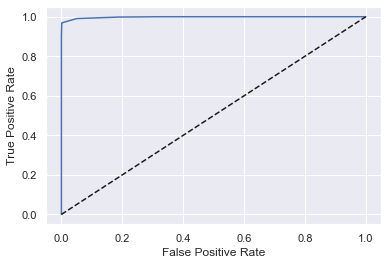

0.9980790824852637


In [139]:
analys_model(rf_clf)

## Train SGD classifier

In [162]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42,n_jobs=-1, loss='log')
sgd.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [169]:
sgd.predict_proba(X)

array([1.89262262e-244, 4.17019112e-245, 5.43324432e-245, ...,
       7.87147856e-246, 6.95674056e-244, 5.09002385e-245])

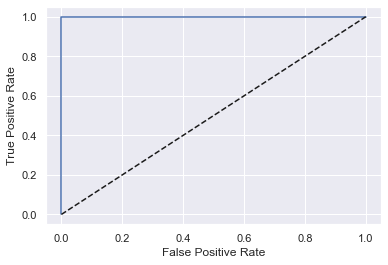

1.0


In [167]:
analys_model(sgd)

In [201]:
y_probs = cross_val_predict(sgd, X, y, cv=10, method="predict_proba", n_jobs=-1)

In [204]:
roc_auc_score(y, y_probs[:, -1])

1.0

# Submit Predictions

In [164]:
y_pred = sgd.predict_proba(X_test)[:, 1]
y_final = pd.DataFrame({'TransactionID': test_transaction['TransactionID'],
                        'isFraud': y_pred})

In [165]:
y_final.to_csv(os.path.join(DATASET_PATH, 'answer.csv'), index=False)

In [166]:
y_final.head()

,TransactionID,isFraud
0,3663549,3.862824e-233
1,3663550,5.645877e-233
2,3663551,2.875620e-232
3,3663552,2.172257e-233
4,3663553,1.530796e-232
